# Twitter Tweets Analysis
we have taken the challenge of Analyzing Sentiments from Twitter data, so we will focus on how to generate word frequencies and use it to create Word Clouds in Python that will help us get a better overall understanding of the dataset.

In [13]:
import pandas as pd


In [14]:
data=pd.read_csv("E:/Exploring_Text_Data/tweets.csv", encoding = 'ISO-8859-1')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
Unnamed: 0       14940 non-null int64
X                14940 non-null int64
text             14940 non-null object
favorited        14940 non-null bool
favoriteCount    14940 non-null int64
replyToSN        1102 non-null object
created          14940 non-null object
truncated        14940 non-null bool
replyToSID       886 non-null float64
id               14940 non-null float64
replyToUID       1102 non-null float64
statusSource     14940 non-null object
screenName       14940 non-null object
retweetCount     14940 non-null int64
isRetweet        14940 non-null bool
retweeted        14940 non-null bool
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [16]:
data.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


As can be seen above, text column is of interest to us as it contains the tweet. At this point, you don't have to worry about other columns as that will be handled in future modules. Let's go ahead and inspect some of the tweets.
2. Generating Word Frequency
Let's first generate a frequency table of all the words present in all the tweets combined.

In [22]:
def gen_words(text):
    words_list=[]
    
     #Loop over all the tweets and extract words into word_list
    for tweets in text.split():
        words_list.extend(tweets)
    
     #Create word frequencies using word_list
    Words_freq=pd.Series(words_list).value_counts()
    
    #Print top 20 words
    Words_freq[:20]
    
    return Words_freq

word_fre=gen_words(data.text.str)
        

# 3. EDA using Word Clouds
Now that we have succesfully created a frequency table, we can use that to create multiple visualizations in the form of word clouds. I will create a  word cloud of top 100-200 words.
Note:- You'll use the WordCloud library of Python. You can install it by - 
pip install wordcloud

In [18]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

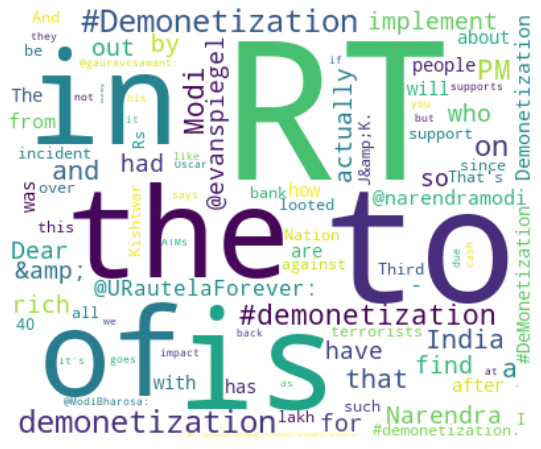

In [23]:
#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_fre)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Few things to Note:-
There is noise in the form of "RT" and "&amp" which can be removed from the word frequency.

Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's tweets.

Words like "demonetization" have occured multiple times. The reason for this is that the current text is not Normalized so words like "demonetization", "Demonetization" etc. are all considered as different words.

# Text Cleaning

In [24]:
import re

In [26]:
def clean_text(text):
    #Remove RT
    text=re.sub(r'RT', '', text)
    
    text=re.sub(r'&amp','',text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [27]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'just', 'me', "wasn't", 'cannot', 'during', 'r', "you'll", "he'll", 'or', 'most', 'some', "i'll", 'they', 'up', "they'll", 'all', 'own', 'them', 'so', 'after', 'above', 'we', 'themselves', 'into', 'him', 'not', 'over', 'no', 'also', 'be', 'which', 'each', 'again', 'his', 'because', 'k', 'if', "couldn't", 'when', 'would', 'hers', 'been', 'about', "we're", 'was', "there's", "won't", 'few', "she'd", 'being', 'have', 'get', 'by', "it's", "mustn't", "when's", 'shall', 'it', "shan't", "haven't", 'why', 'a', "we'll", 'and', "can't", "isn't", 'i', 'http', "we've", 'out', "you'd", 'our', 'you', "they're", 'myself', 'whom', 'do', 'had', 'is', "don't", 'very', 'between', 'an', 'against', 'but', 'does', "who's", 'on', 'having', "aren't", 'herself', "she'll", 'as', 'yourselves', "why's", 'itself', "i'd", 'otherwise', 'he', 'she', 'of', 'ours', 'too', 'under', "she's", 'than', 'are', "weren't", 'were', 'has', 'these', "hadn't", "he'd", 'off', 'below', "you're", 'my', "that's", 'yourself', "how's", 

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds. We'll call the previous functions of clean_text() and gen_words() to perform cleaning and frequency computation operation respectively and drop the words present in STOPWORDS from the word_freq dictionary.

In [34]:
text=data.text.apply(lambda x:clean_text(x))
word_fre=gen_words(data.text.str)
word_fre = word_fre.drop(labels=STOPWORDS, errors='ignore')

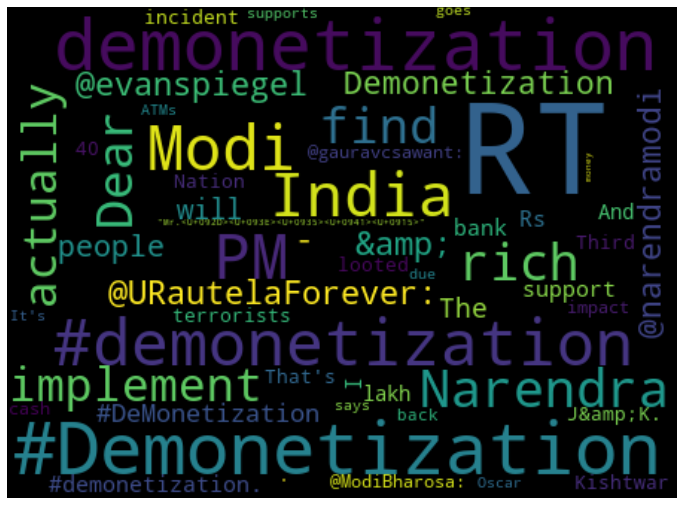

In [35]:
#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='black').generate_from_frequencies(word_fre)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Important Insights:

1)It is evident that people are talking about govt. policies like demonetization, J&K.

2)There are some personalitites that are mentioned numerous times like evanspiegel, PM Narendra Modi, Dr Kumar Vishwas etc.

3)There are also talks about oscars, youtube and terrorists

4)There are many sub-topics that revolve around demonetization like atms, bank, cash, paytm etc. Which tells that many people are concerned about it.